## **APRENDIZAJE NO SUPERVISADO**

### **Clustering**

En este notebook veremos, dentro de la técnica de `clustering`, los dos algoritmos estudiados en la parte teórica: K-means y DBSCAN.

### *`K-means`*

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de K-means.


Para abordar esta temática, generaremos varios datasets sintéticos. Podremos observar que estos datos vienen con una etiqueta asociada, donde nos indica a qué cluster pertenecen. La idea, en realidad, es utilizar los métodos de clustering estudiados para poder identificar los clusters sin conocer esta etiqueta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
from sklearn.datasets import make_blobs, make_moons

# Creamos los datasets sintéticos

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

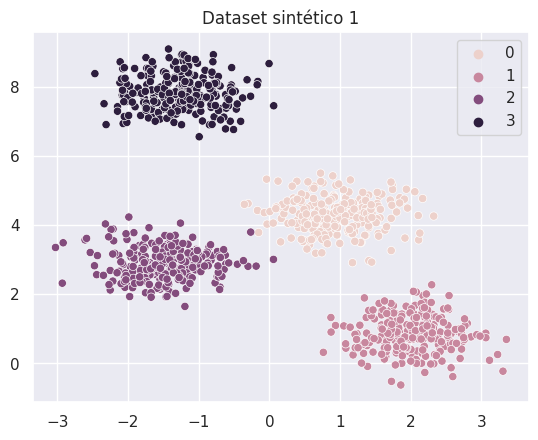

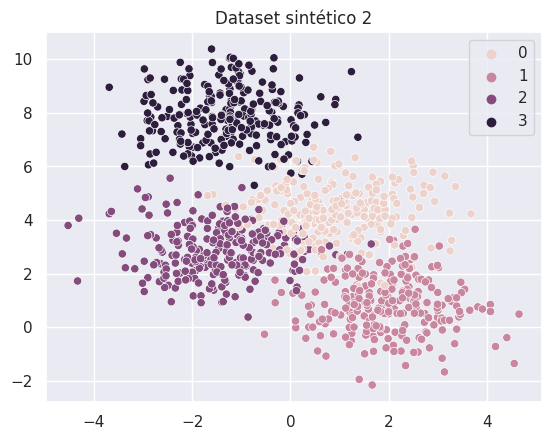

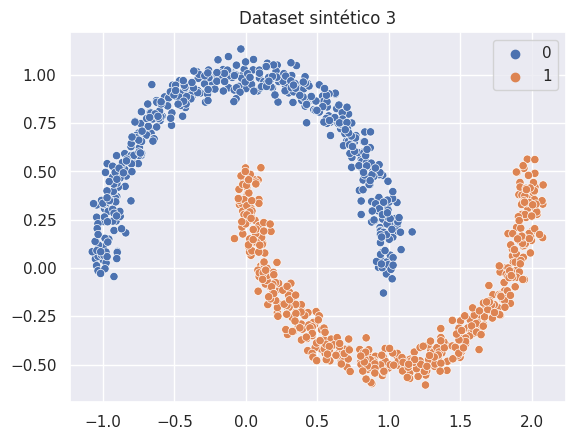

In [3]:
# Ploteamos cada uno de ellos

sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.title('Dataset sintético 1')
plt.show()
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.title('Dataset sintético 2')
plt.show()
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.title('Dataset sintético 3')
plt.show()


Procedemos a instanciar los modelos para cada dataset, indicando en cada uno la cantidad de clusters.

In [4]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=4, random_state=0)
kmeans_2 = KMeans(n_clusters=4, random_state=0)
kmeans_3 = KMeans(n_clusters=2, random_state=0)

In [5]:
# Entrenamos. A diferencia del aprendizaje supervisado, notarán que ya no le pasamos una etiqueta de salida. Solo los atributos.

kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [6]:
# Aquí, corroboramos la etiqueta que el modelo asoció a cada una de las instancias. Repetimos para los tres modelos.

# Modelo 1
etiquetas_1 = kmeans_1.labels_
centros_1 = kmeans_1.cluster_centers_

# Modelo 2
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_

# Modelo 3
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_


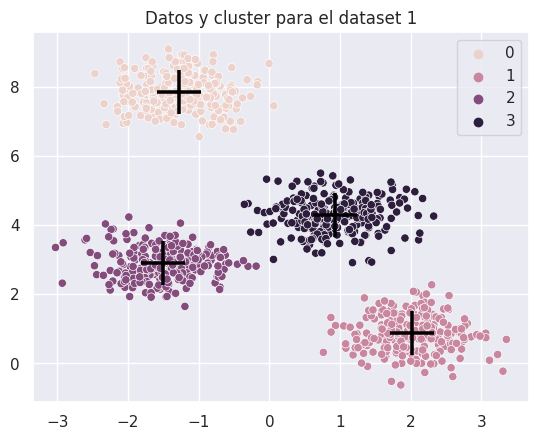

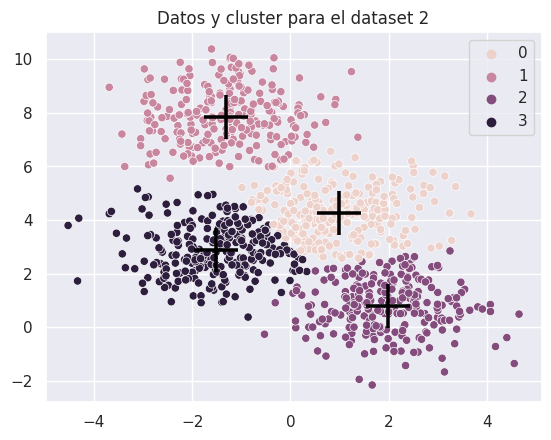

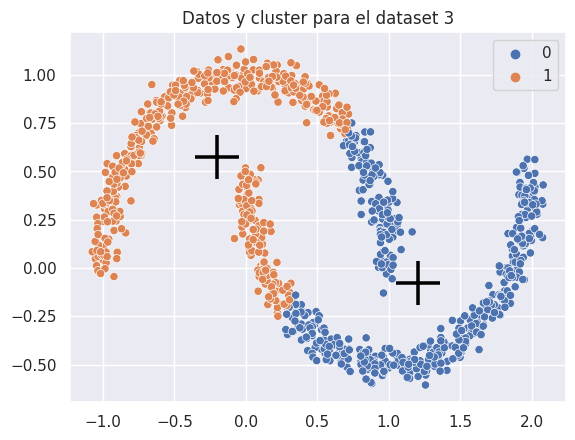

In [7]:
# Pasamos a graficar

# Dataset 1
sns.scatterplot(x = X1[:, 0], y = X1[:, -1], hue = etiquetas_1)
sns.scatterplot(x = centros_1[:, 0], y = centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y cluster para el dataset 1')
plt.show()

# Dataset 2
sns.scatterplot(x = X2[:, 0], y = X2[:, -1], hue = etiquetas_2)
sns.scatterplot(x = centros_2[:, 0], y = centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y cluster para el dataset 2')
plt.show()

# Dataset 3
sns.scatterplot(x = X3[:, 0], y = X3[:, -1], hue = etiquetas_3)
sns.scatterplot(x = centros_3[:, 0], y = centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y cluster para el dataset 3')
plt.show()

Ya que el dataset sintético nos brinda la etiqueta de cada instancdia, veamos una matriz de confusión para cada uno de los datasets.

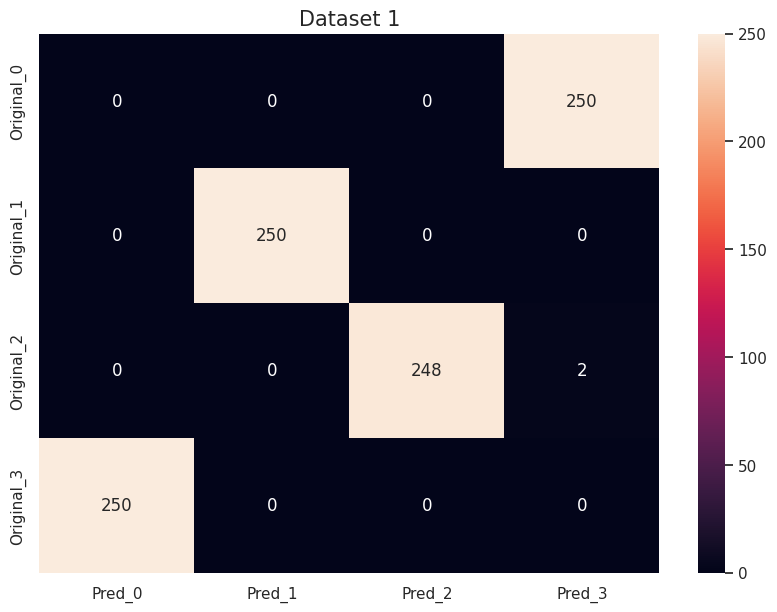

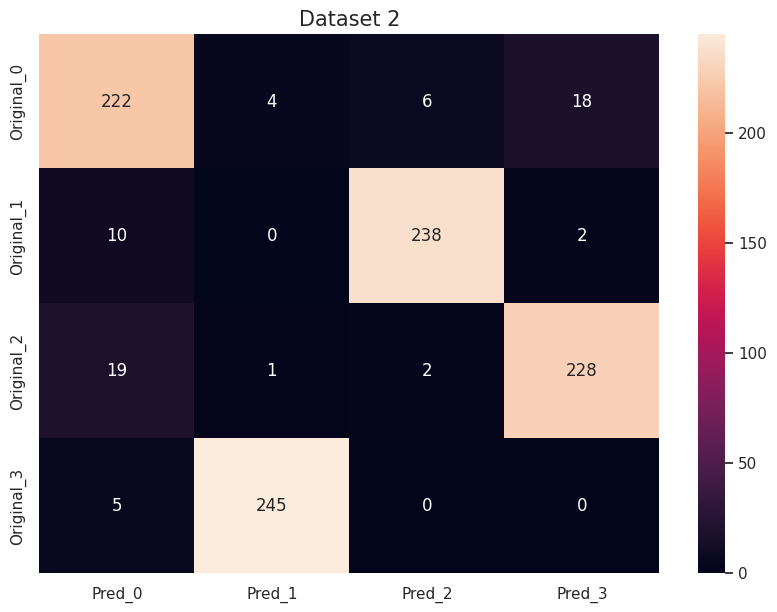

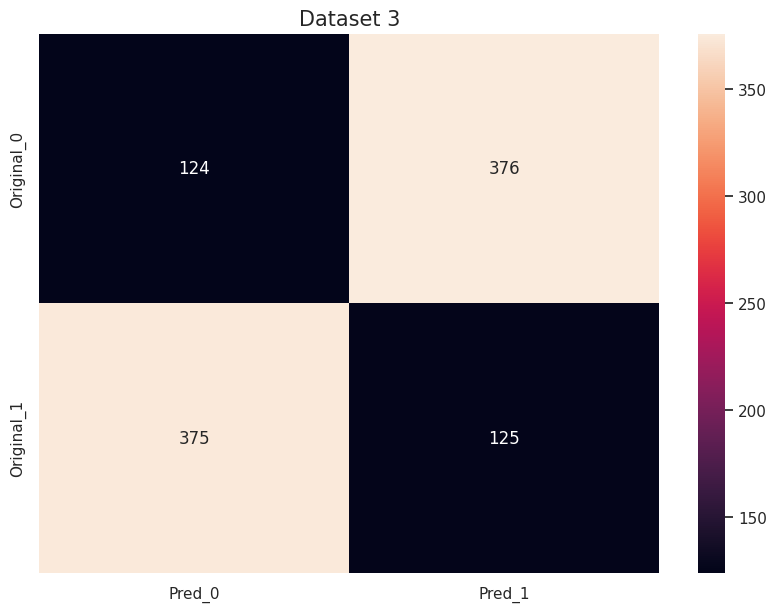

In [8]:
from sklearn.metrics import confusion_matrix

# Dataset 1
cm = confusion_matrix(y1, etiquetas_1)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title('Dataset 1', fontsize = 15)
plt.show()

# Dataset 2
cm = confusion_matrix(y2, etiquetas_2)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title('Dataset 2', fontsize = 15)
plt.show()

# Dataset 3
cm = confusion_matrix(y3, etiquetas_3)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1']],
                  columns = [i for i in ['Pred_0','Pred_1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title('Dataset 3', fontsize = 15)
plt.show()

**En este [link](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/) podrán acceder a otro ejemplo de implementación de K-means.** Asimismo, este [artículo](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) de Towards Data Science les puede ser de utilidad.

### *`DBSCAN`*

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) de DBSCAN.

Continuaremos trabajando con los tres datasets sintéticos que hemos generado.

In [26]:
from sklearn.cluster import DBSCAN

# Especificamos los valores de los hiperparámetros de los tres modelos.

db_1 = DBSCAN(eps=0.5, min_samples=10)
db_2 = DBSCAN(eps=0.3, min_samples=10)
db_3 = DBSCAN(eps=0.2, min_samples=8)

In [27]:
# Realizamos el entrenamiento de los modelos instanciados

db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=8)

Las etiquetas quedan asignadas en la variable `labels_`. Cuando el **label = -1** quiere decir que esa instancia fue considerada ruido.

Podemos consultar tanto el número de clusters como el número de instancias consideradas ruido.

In [28]:
# Consultamos las etiquetas del primer modelo
labels_1 = db_1.labels_

# Número de clusters en las etiquetas, ignorando el ruido en caso que esté presente.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

set(labels_1)

{-1, 0, 1, 2, 3}

In [29]:
# Consultamos para el primer modelo

print('Número estimado de clusters: %d' % n_clusters_1)
print('Número estimado de puntos de ruido: %d' % n_noise_1)

Número estimado de clusters: 4
Número estimado de puntos de ruido: 10


Definimos una función para graficar los resultados, de manera tal que coloree los distintos clusters y coloque en gris los datos que se consideran ruido. Además, fijamos en tamaño más grande las instancias que son CORES.

In [30]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Creamos una máscara
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result


    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Número estimado de clusters: %d' % n_clusters_1, fontsize = 15)
    plt.show()
    return

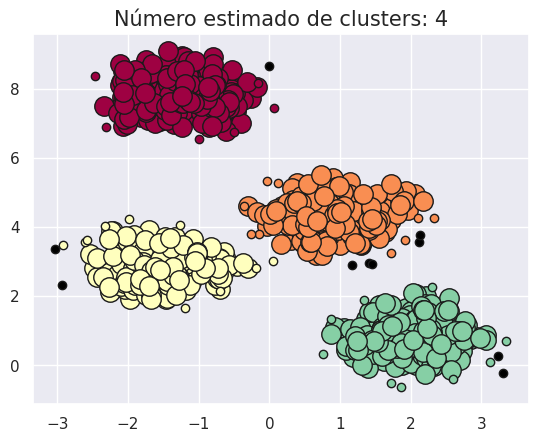

In [31]:
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

**Vamos a pasar ahora al dataset 2 y 3**.

Estimated number of clusters: 5
Estimated number of noise points: 537


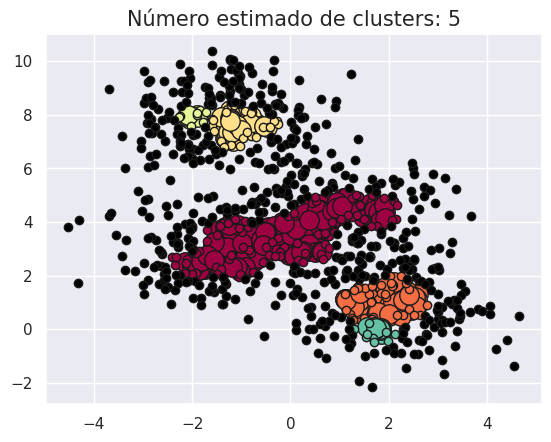

In [15]:
# Consultamos las etiquetas
labels_2 = db_2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_2 = list(labels_2).count(-1)

print('Estimated number of clusters: %d' % n_clusters_2)
print('Estimated number of noise points: %d' % n_noise_2)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_2 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_2[db_2.core_sample_indices_] = True

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

Estimated number of clusters: 2
Estimated number of noise points: 0


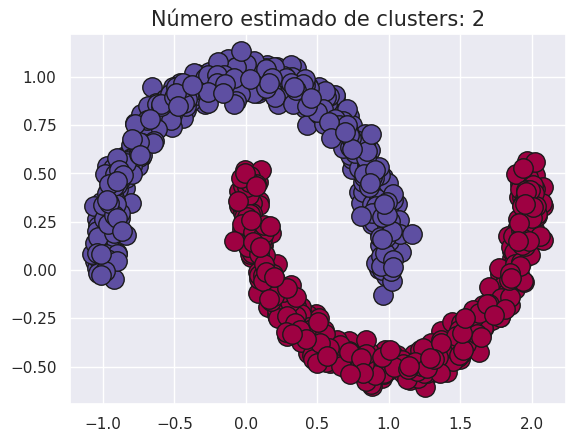

In [16]:
# Consultamos las etiquetas
labels_3 = db_3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

print('Estimated number of clusters: %d' % n_clusters_3)
print('Estimated number of noise points: %d' % n_noise_3)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_3 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_3[db_2.core_sample_indices_] = True

plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)